In [1]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import factorial
from scipy.optimize import curve_fit

In [2]:
# constants

c = 3 * 10 **8
e = 1.6 * 10 **-19
ϵ0 = 8.854 * 10 **-12
me = 0.511 / c**2
mp = 938 / c**2
N_A = 6.022 * 10 **23
m_α = 3727.379 / c**2
W_air = 85.7 * 10 **-6
W_He = 41.8 * 10 **-6
W_Ar = 187 * 10 **-6
Z_α = 2
Ekin_α = 5.486
k_b = 1.38 * 10 **-23
k_air = 14.4
k_He = 2
k_Ar = 18
# MeV/J
MeV_J = 1/e * 10**-6
n_refr = 1.33000
λ_green = 532*10**-9 #m
η = 0.954*10**-3
Δη=0.023*10**-3

In [11]:
#data input

T = 295
T_err = 1
angle_err =0.5

path = "Data/"
angles_A = range(20,160,10) 
angles_B = angles_A[1:]
angle_C = 40
angle_D = 40
data_A_cor = []
data_A_int = []
data_B_cor = []
data_B_int = []
data_C_cor = []
data_C_int = []
data_D_cor = []
data_D_int = []


# sample A
files = ['A' + str(a) + '.ASC' for a in angles_A]
for file in files:
    input = path+file
    read_cor = False;
    read_int = False;
    data_cor_angle = [[],[]]
    data_int_angle = [[],[]]
    
    for line in open(input):
    #print(line)        
        if(read_int):
            d = line.split("\t")    
            try :
                data_int_angle[0].append(float(d[0])) 
                data_int_angle[1].append(float(d[1])) 
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Count Rate"' in line):
            read_cor =False;
            read_int = True;

        if(read_cor):
            line = line.replace("\n"," ")
            d = line.split("\t") 
            #print(d)
            try :
                data_cor_angle[0].append(float(d[0])) 
                data_cor_angle[1].append(float(d[1]))  
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Correlation"' in line):
            #print("read Correlation")
            read_cor =True;
            read_int =False;

    
    data_A_cor.append(data_cor_angle);
    data_A_int.append(data_int_angle);     


# sample B
files = ['B' + str(a) + '.ASC' for a in angles_B]
for file in files:
    input = path+file
    read_cor = False;
    read_int = False;
    data_cor_angle = [[],[]]
    data_int_angle = [[],[]]
    
    for line in open(input):
    #print(line)        
        if(read_int):
            d = line.split("\t")    
            try :
                data_int_angle[0].append(float(d[0])) 
                data_int_angle[1].append(float(d[1])) 
            except ValueError : 
                print("Value Error :",d)

        if('"Count Rate"' in line):
            read_cor =False;
            read_int = True;

        if(read_cor):
            line = line.replace("\n"," ")
            d = line.split("\t") 
            #print(d)
            try :
                data_cor_angle[0].append(float(d[0])) 
                data_cor_angle[1].append(float(d[1]))  
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Correlation"' in line):
            #print("read Correlation")
            read_cor =True;
            read_int =False;

    
    data_B_cor.append(data_cor_angle);
    data_B_int.append(data_int_angle); 

    
# sample C
file = 'C' + str(angle_C) + '.ASC'
input = path+file
read_cor = False;
read_int = False;
data_cor_angle = [[],[]]
data_int_angle = [[],[]]

for line in open(input):
    #print(line)        
    if(read_int):
        d = line.split("\t")    
        try :
            data_int_angle[0].append(float(d[0])) 
            data_int_angle[1].append(float(d[1])) 
        except ValueError : 
            pass#print("Value Error :",d)

    if('"Count Rate"' in line):
        read_cor =False;
        read_int = True;

    if(read_cor):
        line = line.replace("\n"," ")
        d = line.split("\t") 
        #print(d)
        try :
            data_cor_angle[0].append(float(d[0])) 
            data_cor_angle[1].append(float(d[1]))  
        except ValueError : 
               pass#print("Value Error :",d)

    if('"Correlation"' in line):
        #print("read Correlation")
        read_cor =True;
        read_int =False;


data_C_cor.append(data_cor_angle);
data_C_int.append(data_int_angle); 


# sample D
file = 'D' + str(angle_D) + '.ASC'
input = path+file
read_cor = False;
read_int = False;
data_cor_angle = [[],[]]
data_int_angle = [[],[]]

for line in open(input):
    #print(line)        
    if(read_int):
        d = line.split("\t")    
        try :
            data_int_angle[0].append(float(d[0])) 
            data_int_angle[1].append(float(d[1])) 
        except ValueError : 
            print("Value Error :",d)

    if('"Count Rate"' in line):
        read_cor =False;
        read_int = True;

    if(read_cor):
        line = line.replace("\n"," ")
        d = line.split("\t") 
        #print(d)
        try :
            data_cor_angle[0].append(float(d[0])) 
            data_cor_angle[1].append(float(d[1]))  
        except ValueError : 
            pass#print("Value Error :",d)

    if('"Correlation"' in line):
        #print("read Correlation")
        read_cor =True;
        read_int =False;

data_D_cor.append(data_cor_angle);
data_D_int.append(data_int_angle); 

In [4]:
#theoretical functions

def mom_tra(Θ) :
    return 4*np.pi*n_refr/λ_green*np.sin(np.pi/180*Θ/2)

def mom_tra_err(Θ,Θ_err):
    return 2*np.pi**2/180*n_refr/λ_green*np.cos(np.pi/180*Θ/2)*Θ_err

def P(q,a):
    return 9/(q*a)**6*(np.sin(q*a)-q*a*np.cos(q*a))**2
    
def Intensity(q,a,A):
    return A*P(q,a)

def g_1(t,k1,k2,k3):
    return np.exp(k1*t+k2*t**2/2+k3*t**3/6)

def g_2(t,a,k1,k2,k3):
    return a*g_1(t,k1,k2,k3)**2

#def ln_g_2(t,k1,k2,k3,k4,k5,k6,k7):
 #   return #(k1*t+k2*t**2+k3*t**3+k4*t**4+k5*t**5+k6*t**6+k7*t**7)*2

def ln_g_2(t,a,*k):
    sum =0
    i=1
    for x in k:
        sum=sum+x*t**i/factorial(i)
        i+=1
    return 2*sum + np.log(a)

<h1> Static light scattering </h1>

In [12]:
#static light scattering
#evaluation of mean intensitiy
data_A_mean_int = []
data_A_mean_int_err = []
data_B_mean_int = []
data_B_mean_int_err = []

for intensities in data_A_int[:len(angles_A)]:
    mean_value = sum(intensities[1])/len(intensities[1])
    data_A_mean_int_err.append(np.sqrt(sum([(i-mean_value)**2 for i in intensities[1]]))/np.sqrt(len(intensities[1])))
    data_A_mean_int.append(mean_value)

for intensities in data_B_int[:len(angles_B)]:
    mean_value = sum(intensities[1])/len(intensities[1])
    data_B_mean_int_err.append(np.sqrt(sum([(i-mean_value)**2 for i in intensities[1]]))/np.sqrt(len(intensities[1])))
    data_B_mean_int.append(mean_value)

#Intensity correction
for i in range(len(angles_A)):
    data_A_mean_int[i] = data_A_mean_int[i]*np.sin(np.pi/180*angles_A[i])
    data_A_mean_int_err[i] = data_A_mean_int_err[i]*np.sin(np.pi/180*angles_A[i])
    
for i in range(len(angles_B)):
    data_B_mean_int[i] = data_B_mean_int[i]*np.sin(np.pi/180*angles_B[i])
    data_B_mean_int_err[i] = data_B_mean_int_err[i]*np.sin(np.pi/180*angles_A[i])
    
#evaluation of momentum transfer q 
q_A = [mom_tra(Θ) for Θ in angles_A]
q_A_err = [mom_tra_err(Θ,angle_err) for Θ in angles_A]
q_B = [mom_tra(Θ) for Θ in angles_B]
q_B_err = [mom_tra_err(Θ,angle_err) for Θ in angles_B]
q_C = mom_tra(angle_C)
q_C_err = mom_tra_err(angle_C,angle_err) 
q_D = mom_tra(angle_D)
q_D_err = mom_tra_err(angle_D,angle_err) 

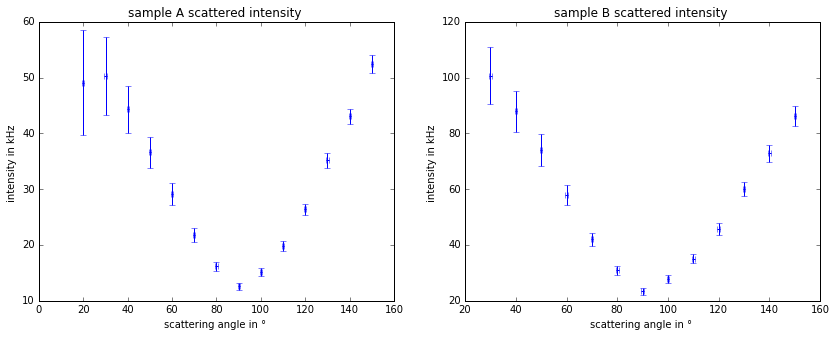

In [6]:
#Plot of mean intensity vs angle
fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].errorbar(angles_A,data_A_mean_int,xerr=0.5,yerr=data_A_mean_int_err,ls="")
#ax[0].scatter(angles_A,data_A_mean_int)
ax[0].set_xlabel("scattering angle in ° ")
ax[0].set_ylabel("intensity in kHz ")
ax[0].set_title("sample A scattered intensity ")

ax[1].errorbar(angles_B,data_B_mean_int,xerr=0.5,yerr=data_B_mean_int_err,ls="")
#ax[1].scatter(angles_B,data_B_mean_int)
ax[1].set_xlabel("scattering angle in ° ")
ax[1].set_ylabel("intensity in kHz ")
ax[1].set_title("sample B scattered intensity ")

#fig.savefig("sls.pdf")

198.267227769
167.376461895


array([  4.81496097e-08,   7.15593336e+01])

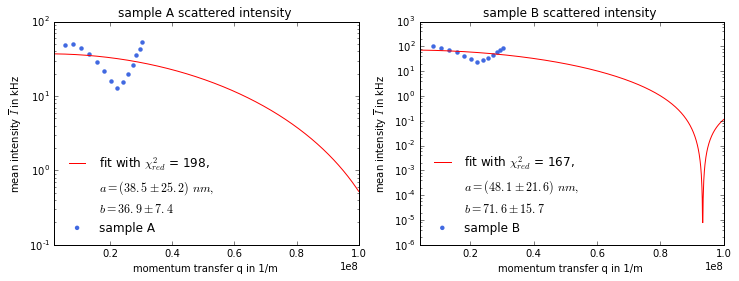

In [7]:
#Plot of mean intensity vs momentum transfer
popt, pcov = curve_fit(Intensity, q_A, data_A_mean_int,p0=[10**-8,100])
a = popt[0]
a_err = np.sqrt(np.diag(pcov))[0]
χ2_red_A = sum(((np.array(data_A_mean_int)-Intensity(np.array(q_A),*popt))/np.array(data_A_mean_int_err))**2)/12
print(χ2_red_A)
q = np.linspace(0.2*10**7,10*10**7,1000)
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].semilogy(q,Intensity(q,*popt),c="r",label="fit with $\chi^2_{red}$ = %d,"%χ2_red_A)
#ax.errorbar(q_A,data_A_mean_int,xerr=q_A_err,yerr=data_A_mean_int_err,ls="",label="sample A")
ax[0].scatter(q_A,data_A_mean_int,c='royalblue',label="sample A",lw=0)
ax[0].semilogy(q,Intensity(q,*popt),lw=0,label=r"$a=(%0.1f \pm %0.1f) \ nm ,$"%(10**9*a,10**9*a_err))
ax[0].semilogy(q,Intensity(q,*popt),lw=0,label=r"$b=%0.1f \pm %0.1f $"%(popt[1],np.sqrt(np.diag(pcov))[1]))

ax[0].set_xlabel("momentum transfer q in 1/m ")
ax[0].set_ylabel("mean intensity $\overline{I}$ in kHz ")
ax[0].set_title("sample A scattered intensity ")
ax[0].set_xlim(0.2*10**7,10**8)
ax[0].legend(loc=0,frameon=False)

popt, pcov = curve_fit(Intensity, q_B, data_B_mean_int,p0=[10**-8,100])
a = popt[0]
a_err = np.sqrt(np.diag(pcov))[0]
χ2_red_B = sum(((np.array(data_B_mean_int)-Intensity(np.array(q_B),*popt))/np.array(data_B_mean_int_err))**2)/11
print(χ2_red_B)

q = np.linspace(0.4*10**7,10*10**7,1000)
#fig,ax = plt.subplots(figsize=(10,8))
ax[1].semilogy(q,Intensity(q,*popt),c="r",label="fit with $\chi^2_{red}$ = %d,"%χ2_red_B)
ax[1].scatter(q_B,data_B_mean_int,lw=0,c='royalblue',label="sample B")
ax[1].semilogy(q,Intensity(q,*popt),lw=0,label="$a=(%0.1f \pm %0.1f) \ nm ,$"%(10**9*a,10**9*a_err))
ax[1].semilogy(q,Intensity(q,*popt),lw=0,label="$b=%0.1f \pm %0.1f $"%(popt[1],np.sqrt(np.diag(pcov))[1]))

ax[1].set_xlabel("momentum transfer q in 1/m ")
ax[1].set_ylabel("mean intensity $\overline{I}$ in kHz ")
ax[1].set_title("sample B scattered intensity ")
ax[1].set_xlim(0.4*10**7,10**8)
ax[1].legend(loc=0,frameon=False)

#fig.savefig("sls_fit.pdf")

popt

array([  4.81496097e-08,   7.15593336e+01])

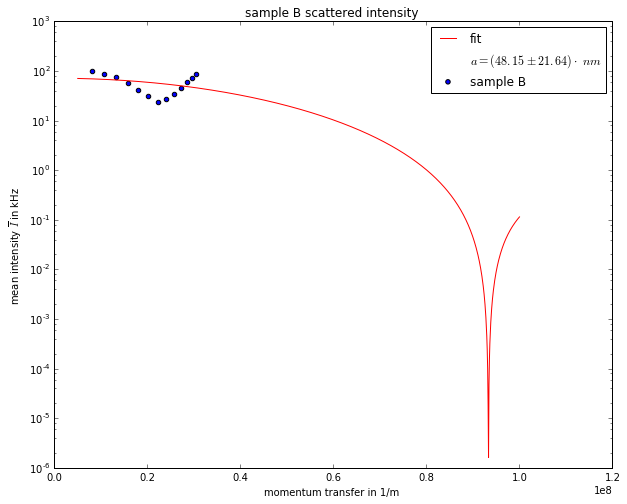

In [8]:
#Plot of mean intensity vs momentum transfer
popt, pcov = curve_fit(Intensity, q_B, data_B_mean_int,p0=[10**-8,100])
a = popt[0]
a_err = np.sqrt(np.diag(pcov))[0]

q = np.linspace(0.5*10**7,10*10**7,1000)
fig,ax = plt.subplots(figsize=(10,8))
ax.semilogy(q,Intensity(q,*popt),c="r",label="fit")
ax.scatter(q_B,data_B_mean_int,label="sample B")
ax.semilogy(q,Intensity(q,*popt),lw=0,label=r"$a=(%0.2f \pm %0.2f)\cdot \ nm $"%(10**9*a,10**9*a_err))

ax.set_xlabel("momentum transfer in 1/m ")
ax.set_ylabel("mean intensity $\overline{I}$ in kHz ")
ax.set_title("sample B scattered intensity ")
ax.legend()
fig.savefig("sls_fit_B.pdf")
popt

<h1> Dynamic light scattering </h1>

In [13]:
for i in range(len(angles_A)):
    data_A_cor[i][1]=[data/data_A_cor[i][1][0] for data in data_A_cor[i][1]]

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


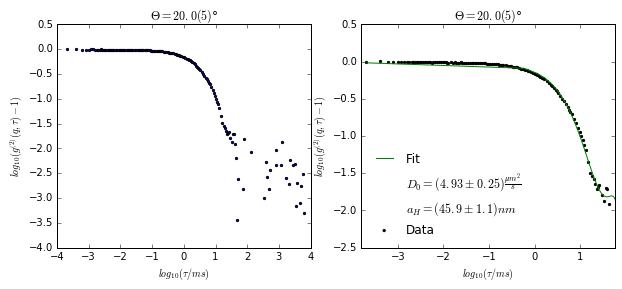

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_xlabel(r'$log_{10}(\tau/ms)$')
ax[0].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax[0].set_title('$\Theta = %.1f(5)$°'%(np.floor(angles_A[0])))
ax[0].scatter(np.log10(data_A_cor[0][0]),np.log10((data_A_cor[0][1])),marker=".")
ax[0].set_xlim(-4,4)

count=0
for x in data_A_cor[0][1]:
    if(x<0.01):
        break
    count+=1
    data_A_cor_red1 = data_A_cor[0][1][:count]
    data_A_cor_red0 = data_A_cor[0][0][:count] 

popt, pcov = curve_fit(ln_g_2,(data_A_cor_red0),np.log(np.abs(data_A_cor_red1)),p0=[data_A_cor_red1[0],-1,1,-1])
d0 = -popt[1]/(q_A[0]**2)   
D0_A.append(d0)
ah = k_b*T/(6*np.pi*η*1000*d0)
d0_err = np.sqrt((np.sqrt(np.diag(pcov))[1]/(q_A[0]**2))**2+(q_A_err[0]*2*popt[1]/(q_A[0]**3))**2)
ah_err = np.sqrt((k_b*T_err/(6*np.pi*η*1000*d0))**2+(d0_err*k_b*T/(6*np.pi*η*(1000*1000*d0**2)))**2+(Δη*k_b*T/(6*np.pi*η**2*1000*d0))**2)

ah_A.append(ah)

#Plot der Fits
t = np.linspace((min(data_A_cor_red0)),(max(data_A_cor_red0))+15,100)
ax[1].set_xlim(np.log10(min(t))-0.1,np.log10(max(t))) 
ax[1].scatter(np.log10(data_A_cor_red0),np.log10((data_A_cor_red1)),c="black",marker='.',label="Data")
ax[1].plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax[1].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=(%0.2f \pm %0.2f) \frac{μm^2}{s} $"%(d0*10**15,d0_err*10**15))
ax[1].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=(%0.1f \pm %0.1f) nm$"%(ah*10**9,ah_err*10**9))
ax[1].set_xlabel(r'$log_{10}(\tau/ms)$')
ax[1].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax[1].set_title('$\Theta = %.1f(5)$°'%(np.floor(angles_A[0])))
ax[1].legend(loc="best",frameon=False)

#fig.savefig("dls_sample_A_single.pdf")

sample A
averaged hydrodynamic Radius:  43.8867488516 +- 3.1382632624  nm
averaged diffusion coefficient:  5.18215803453e-15 +- 3.57864040531e-16  m^2/s


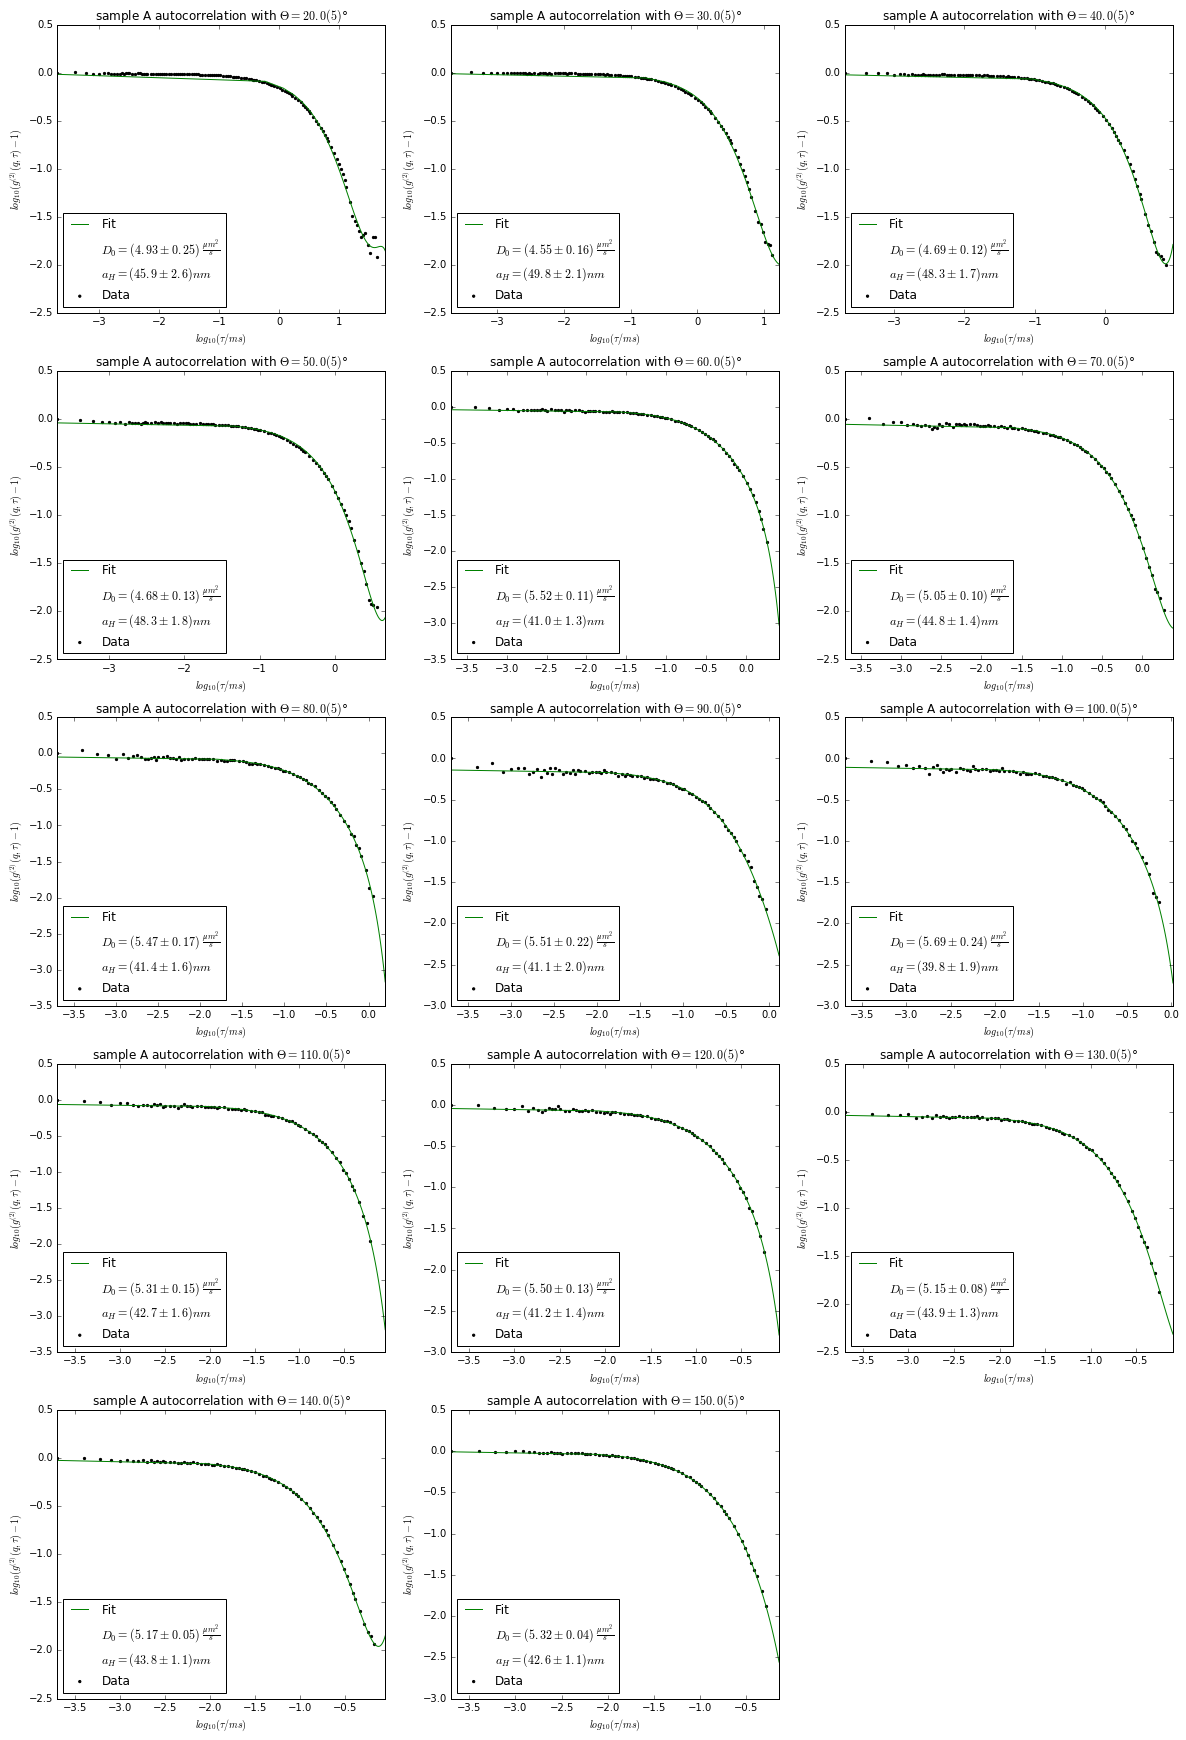

In [18]:
########## sample A ########## 
ah_A = []
D0_A = []
D0_A_mean = 0
ah_A_mean = 0

di=3
fig,ax = plt.subplots(len(angles_A)//di+1,di,figsize=(20,30))

#cut of the noises at the end
for j in range(len(angles_A)):
    i=0
    for x in data_A_cor[j][1]:
        if(x<0.01):
            break
        i+=1
    data_A_cor[j][1] = data_A_cor[j][1][:i]
    data_A_cor[j][0] = data_A_cor[j][0][:i]  

for i in range(len(angles_A)):
    #fitting the curve
    popt, pcov = curve_fit(ln_g_2,(data_A_cor[i][0]),np.log(np.abs(data_A_cor[i][1])),p0=[data_A_cor[i][1][0],-1,1,-1])
    d0 = -popt[1]/(q_A[i]**2)   
    D0_A.append(d0)
    ah = k_b*T/(6*np.pi*η*1000*d0)
    d0_err = np.sqrt((np.sqrt(np.diag(pcov))[1]/(q_A[i]**2))**2+(q_A_err[i]*2*popt[1]/(q_A[i]**3))**2)
    ah_err = np.sqrt((k_b*T_err/(6*np.pi*η*1000*d0))**2+(1000*d0_err*k_b*T/(6*np.pi*η*(1000*1000*d0**2)))**2+(Δη*k_b*T/(6*np.pi*η**2*1000*d0))**2)
    ah_A.append(ah)
    
    #Plot der Fits
    t = np.linspace((min(data_A_cor[i][0])),(max(data_A_cor[i][0]))+6/(i+35)+15/(i+1)**2,100)
    ax[i//di][i%di].set_xlim(np.log10(min(t)),np.log10(max(t)))
    ax[i//di][i%di].scatter(np.log10(data_A_cor[i][0]),np.log10((data_A_cor[i][1])),marker='.',c="black",label="Data")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=(%0.2f \pm %0.2f) \ \frac{μm^2}{s} $"%(d0*10**15,d0_err*10**15))
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=(%0.1f \pm %0.1f) nm$"%(ah*10**9,ah_err*10**9))
    ax[i//di][i%di].set_xlabel(r'$log_{10}(\tau/ms)$')
    ax[i//di][i%di].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
    ax[i//di][i%di].set_title('sample A autocorrelation with $\Theta = %.1f(5)$°'%(np.floor(angles_A[i])))
    ax[i//di][i%di].legend(loc="best")
    
    
ax[4][2].set_visible(False)
    
ah_A_mean = sum(ah_A)/len(angles_A)
ah_A_mean_err = np.sqrt(sum([(a-ah_A_mean)**2 for a in ah_A])/(len(angles_A)-1))
D0_A_mean = sum(D0_A)/len(angles_A)
D0_A_mean_err = np.sqrt(sum([(d-D0_A_mean)**2 for d in D0_A])/(len(angles_A)-1))
print("sample A")
print("averaged hydrodynamic Radius: ",(ah_A_mean*10**9),"+-",(ah_A_mean_err*10**9)," nm")
print("averaged diffusion coefficient: ",D0_A_mean,"+-",(D0_A_mean_err)," m^2/s")

#fig.savefig("dls_sample_A.pdf")

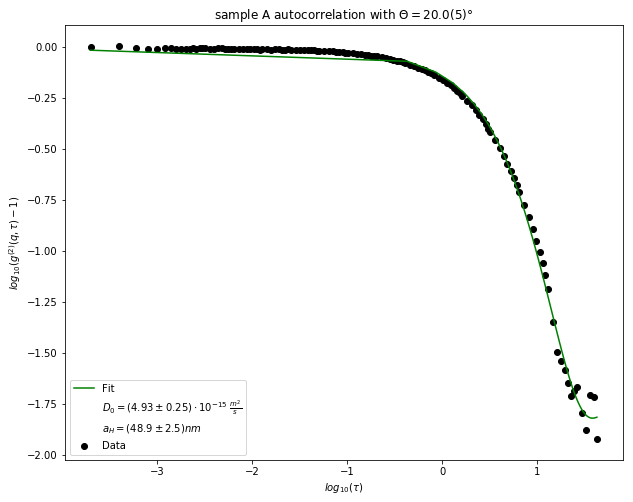

In [122]:
fig,ax = plt.subplots(figsize=(10,8))
popt, pcov = curve_fit(ln_g_2,(data_A_cor[0][0]),np.log(np.abs(data_A_cor[0][1])),p0=[data_A_cor[0][1][0],-1,1,-1])
d0 = -popt[1]/(q_A[0]**2)   
D0_A.append(d0)
ah = k_b*T/(6*np.pi*η*d0)
d0_err = np.sqrt((np.sqrt(np.diag(pcov))[1]/(q_A[0]**2))**2+(q_A_err[0]*2*popt[1]/(q_A[0]**3))**2)
ah_err = np.sqrt((k_b*T_err/(6*np.pi*η*d0))**2+(d0_err*k_b*T/(6*np.pi*η*(d0**2)))**2+(Δη*k_b*T/(6*np.pi*η**2*d0))**2)

ah_A.append(ah)

#Plot der Fits
t = np.linspace((min(data_A_cor[0][0])),(max(data_A_cor[0][0])),100)  
ax.scatter(np.log10(data_A_cor[0][0]),np.log10((data_A_cor[0][1])),c="black",label="Data")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=(%0.2f \pm %0.2f)\cdot 10^{-15} \ \frac{m^2}{s} $"%(d0*10**15,d0_err*10**15))
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=(%0.1f \pm %0.1f) nm$"%(ah*10**9,ah_err*10**9))
ax.set_xlabel(r'$log_{10}(\tau)$')
ax.set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax.set_title('sample A autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angles_A[0])))
ax.legend(loc="best")

fig.savefig("dls_sample_A_single.pdf")

sample B
averaged hydrodynamic Radius:  53.2256803255 +- 1.47266956662  nm
averaged diffusion coefficient:  4.25635230483e-15 1.17863417656e-16  m^2/s


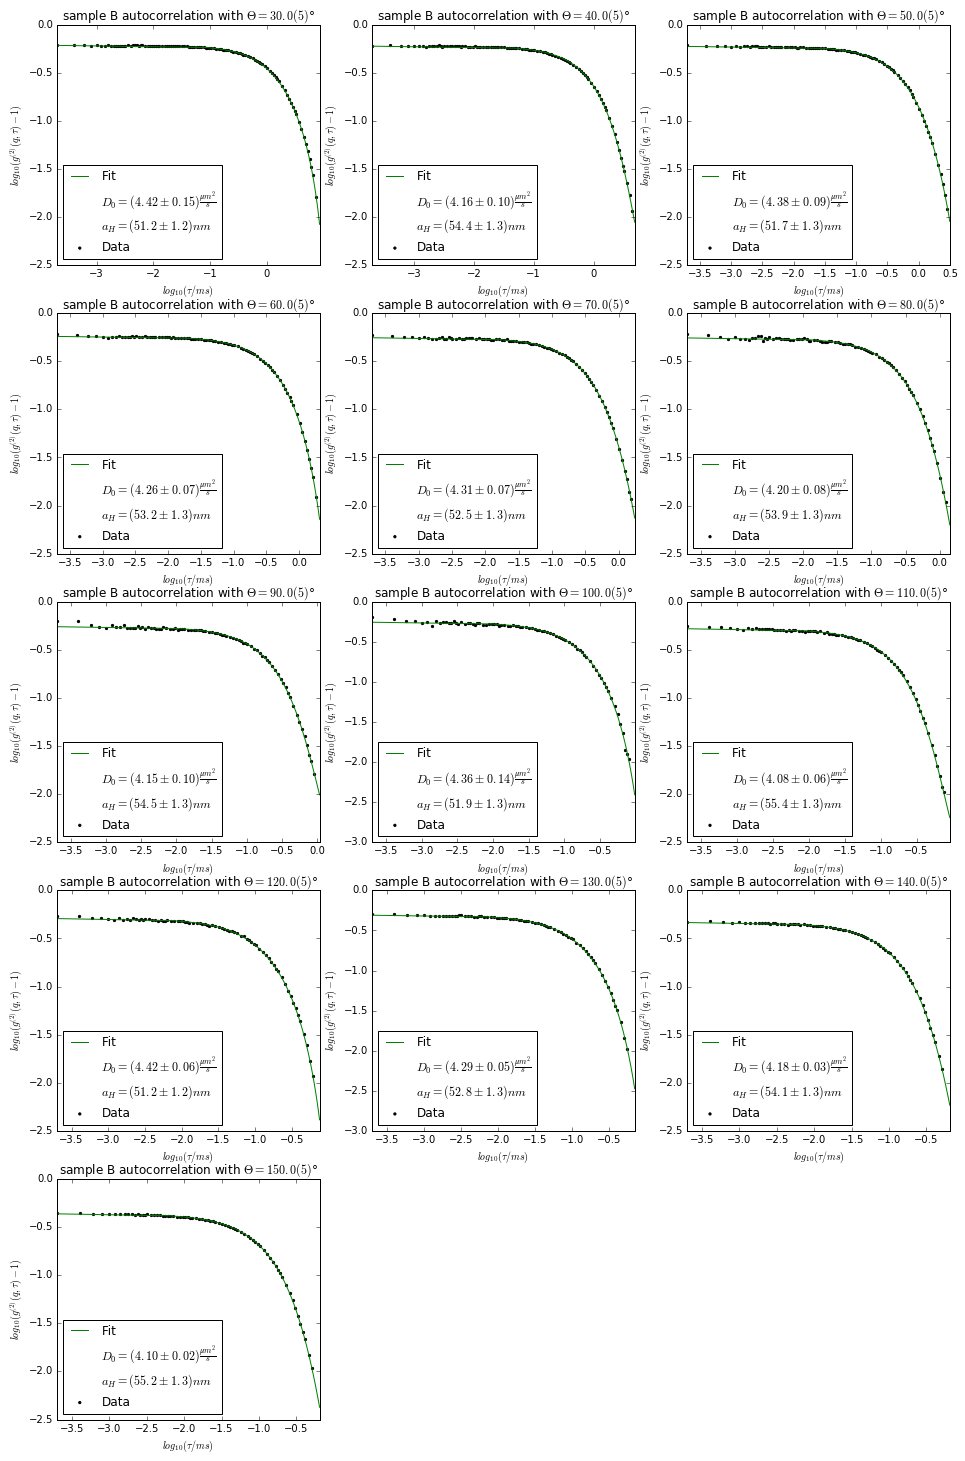

In [23]:
########## sample B ########## 
ah_B = []
D0_B = []
D0_B_mean = 0
ah_B_mean = 0

di=3
fig,ax = plt.subplots(len(angles_B)//di+1,di,figsize=(16,25))

#cut of the noises at the end
for j in range(len(angles_B)):
    i=0
    for x in data_B_cor[j][1]:
        if(x<0.01):
            break
        i+=1
    data_B_cor[j][1] = data_B_cor[j][1][:i]
    data_B_cor[j][0] = data_B_cor[j][0][:i]  

for i in range(len(angles_B)):
    #fitting the curve
    popt, pcov = curve_fit(ln_g_2,(data_B_cor[i][0]),np.log(np.abs(data_B_cor[i][1])),p0=[data_B_cor[i][1][0],-1,1,-1])
    d0 = -popt[1]/(q_B[i]**2)    
    D0_B.append(d0)
    ah = k_b*T/(6*np.pi*η*1000*d0)
    d0_err = np.sqrt((np.sqrt(np.diag(pcov))[1]/(q_B[i]**2))**2+(q_B_err[i]*2*popt[1]/(q_B[i]**3))**2)
    ah_err = np.sqrt((k_b*T_err/(6*np.pi*η*1000*d0))**2+(d0_err*k_b*T/(6*np.pi*η*(1000*1000*d0**2)))**2+(Δη*k_b*T/(6*np.pi*η**2*1000*d0))**2)
   
    ah_B.append(ah)
    
    #Plot der Fits
    t = np.linspace((min(data_B_cor[i][0])),(max(data_B_cor[i][0]))+6/(i+35)+1/(i+1)**2,100)
    ax[i//di][i%di].set_xlim(np.log10(min(t)),np.log10(max(t)))
    ax[i//di][i%di].scatter(np.log10(data_B_cor[i][0]),np.log10((data_B_cor[i][1])),marker='.',c="black",label="Data")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=(%0.2f \pm %0.2f)\frac{μm^2}{s} $"%(d0*10**15,d0_err*10**15))
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=(%0.1f \pm %0.1f) nm$"%(ah*10**9,ah_err*10**9))
    ax[i//di][i%di].set_xlabel(r'$log_{10}(\tau/ms)$')
    ax[i//di][i%di].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
    ax[i//di][i%di].set_title('sample B autocorrelation with $\Theta = %.1f(5)$°'%(np.floor(angles_B[i])))
    ax[i//di][i%di].legend(loc="best")
    
ax[4][1].set_visible(False)
ax[4][2].set_visible(False)    

ah_B_mean = sum(ah_B)/len(angles_B)
ah_B_mean_err = np.sqrt(sum([(a-ah_B_mean)**2 for a in ah_B])/(len(angles_B)-1))
D0_B_mean = sum(D0_B)/len(angles_B)
D0_B_mean_err = np.sqrt(sum([(d-D0_B_mean)**2 for d in D0_B])/(len(angles_B)-1))
print("sample B")
print("averaged hydrodynamic Radius: ",(ah_B_mean*10**9),"+-",(ah_B_mean_err*10**9)," nm")
print("averaged diffusion coefficient: ",D0_B_mean,(D0_B_mean_err)," m^2/s")

#fig.savefig("dls_sample_B.pdf")

sample C
averaged hydrodynamic Radius:  63.5655279042  nm
averaged diffusion coefficient:  3.56147538017e-15  m^2/s


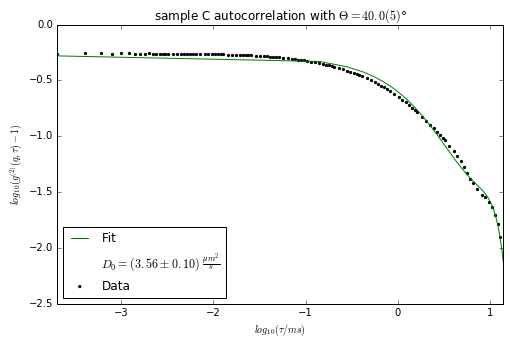

In [20]:
########## sample C ########## 
D0_C_mean = 0
ah_C_mean = 0

fig,ax = plt.subplots(figsize=(8,5))

#cut of the noises at the end
i=0
for x in data_C_cor[0][1]:
    if(x<0.01):
        break
    i+=1
data_C_cor[0][1] = data_C_cor[0][1][:i]
data_C_cor[0][0] = data_C_cor[0][0][:i]  

#fitting the curve
popt, pcov = curve_fit(ln_g_2,(data_C_cor[0][0]),np.log(np.abs(data_C_cor[0][1])),p0=[data_C_cor[0][1][0],-1,1,-1])
d0 = -popt[1]/(q_C**2)    
D0_C_mean = d0
ah = k_b*T/(6*np.pi*η*1000*d0)
d0_err = np.sqrt((np.sqrt(np.diag(pcov))[1]/(q_C**2))**2+(q_C_err*2*popt[1]/(q_C**3))**2)
ah_err = np.sqrt((k_b*T_err/(6*np.pi*η*1000*d0))**2+(d0_err*k_b*T/(6*np.pi*η*(1000*1000*d0**2)))**2+(Δη*k_b*T/(6*np.pi*η**2*1000*d0))**2)

ah_C_mean = ah

#Plot der Fits
t = np.linspace((min(data_C_cor[0][0])),(max(data_C_cor[0][0]))+1,100)
ax.set_xlim(np.log10(min(t)),np.log10(max(t)))
ax.scatter(np.log10(data_C_cor[0][0]),np.log10((data_C_cor[0][1])),marker='.',c="black",label="Data")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=(%0.2f \pm %0.2f)\ \frac{μm^2}{s} $"%(d0*10**15,d0_err*10**15))
#ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=(%0.1f \pm %0.1f) nm$"%(ah*10**9,ah_err*10**9))
ax.set_xlabel(r'$log_{10}(\tau/ms)$')
ax.set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax.set_title('sample C autocorrelation with $\Theta = %.1f(5)$°'%(np.floor(angle_C)))
ax.legend(loc="best",frameon=True)


print("sample C")
print("averaged hydrodynamic Radius: ",(ah_C_mean*10**9)," nm")
print("averaged diffusion coefficient: ",D0_C_mean," m^2/s")
#fig.savefig("dls_sample_C.pdf")

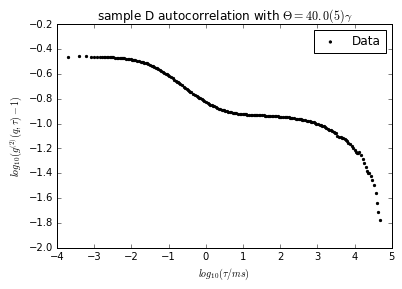

In [21]:
########## sample D ########## 
D0_D_mean = 0
ah_D_mean = 0

fig,ax = plt.subplots(figsize=(6,4))

#cut of the noises at the end
i=0
for x in data_D_cor[0][1]:
    if(x<0.01):
        break
    i+=1
data_D_cor[0][1] = data_D_cor[0][1][:i]
data_D_cor[0][0] = data_D_cor[0][0][:i]  

#popt, pcov = curve_fit(ln_g_2,(data_D_cor[0][0]),np.log(np.abs(data_D_cor[0][1])),p0=[-1,1,-1])
#d0 = -popt[0]/(q_D**2)    
#D0_D_mean = d0
#ah = k_b*T/(6*np.pi*η*d0)
#ah_D_mean = ah

#Plot der Fits
#t = np.linspace((min(data_D_cor[0][0])),(max(data_D_cor[0][0])),100)  
ax.scatter(np.log10(data_D_cor[0][0]),np.log10((data_D_cor[0][1])),marker='.',c="black",label="Data")
#ax.plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax.set_xlabel(r'$log_{10}(\tau/ms)$')
ax.set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax.set_title('sample D autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angle_C)))
ax.legend(loc="best")
ax.set_xlim(-4,5)

#print("sample D")
#print("hydrodynamic Radius: ",ah_D_mean)
#print("diffusion coefficient: ",D0_D_mean)
#fig.savefig("dls_sample_D.pdf")